# Exam: Numerical Analysis for Machine Leaning

## January 16, 2025

### Exercise 1

Load the dataset contained in the file `faces.mat` using the following commands:

In [2]:
import scipy.io as sio

data = sio.loadmat('faces.mat')
X = data['X']

The dataset contains a collection of 5000 $32 \times 32$ grayscale face images. You can plot a single face as follows: 

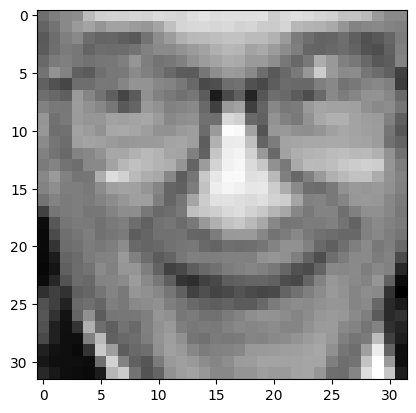

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x0 = np.transpose(np.reshape(X[0, :], (32, 32)))
plt.imshow(x0, cmap='gray')
plt.show()

#### 1) Compute the normalized matrix $\tilde{X}$

In [4]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

X_norm = (X - mean) / std

#### 2) Perform the PCA on $\tilde{X}$ and plot the first 25 eigenfaces

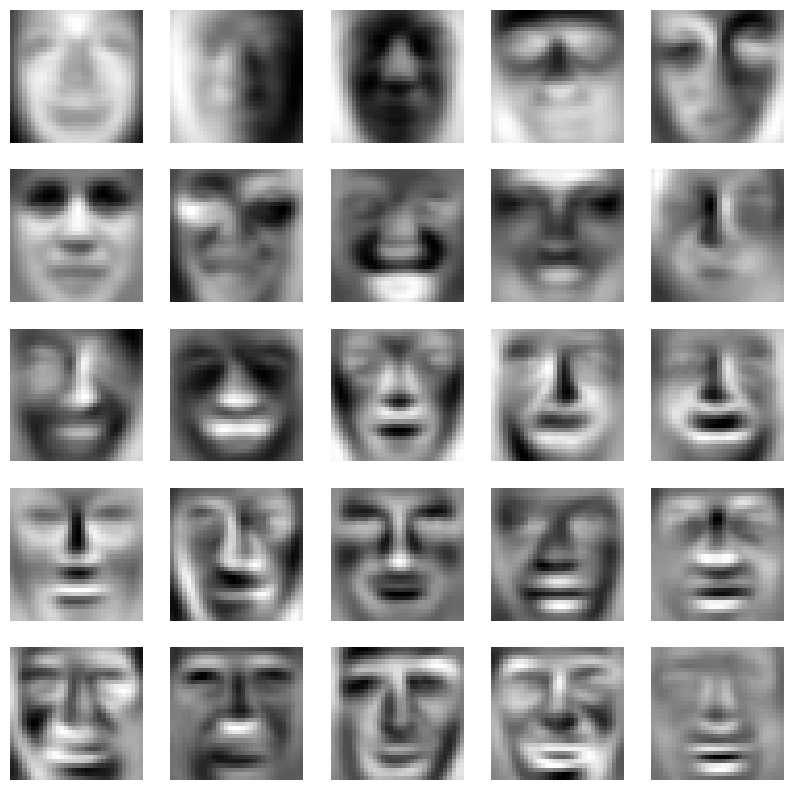

In [5]:
U, S, VT = np.linalg.svd(X_norm, full_matrices=False)

fig, ax = plt.subplots(5, 5, figsize=(10, 10))
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(np.transpose(np.reshape(VT[i, :], (32, 32))), cmap='gray')
    ax[i].axis('off')

plt.show()

#### 3) Reduce the dimension of the sample from 1024 (32 by 32) to 100 by projecting the matrix $\tilde{X}$ onto U:

In [6]:
k = 100

first_pc = U[:, :k] @ np.diag(S[:k])
first_pc.shape

(5000, 100)

#### 4) Plot the original images (pick the first 100) and the ones reconstructed from only the first 100 principal components. Plot also the error.

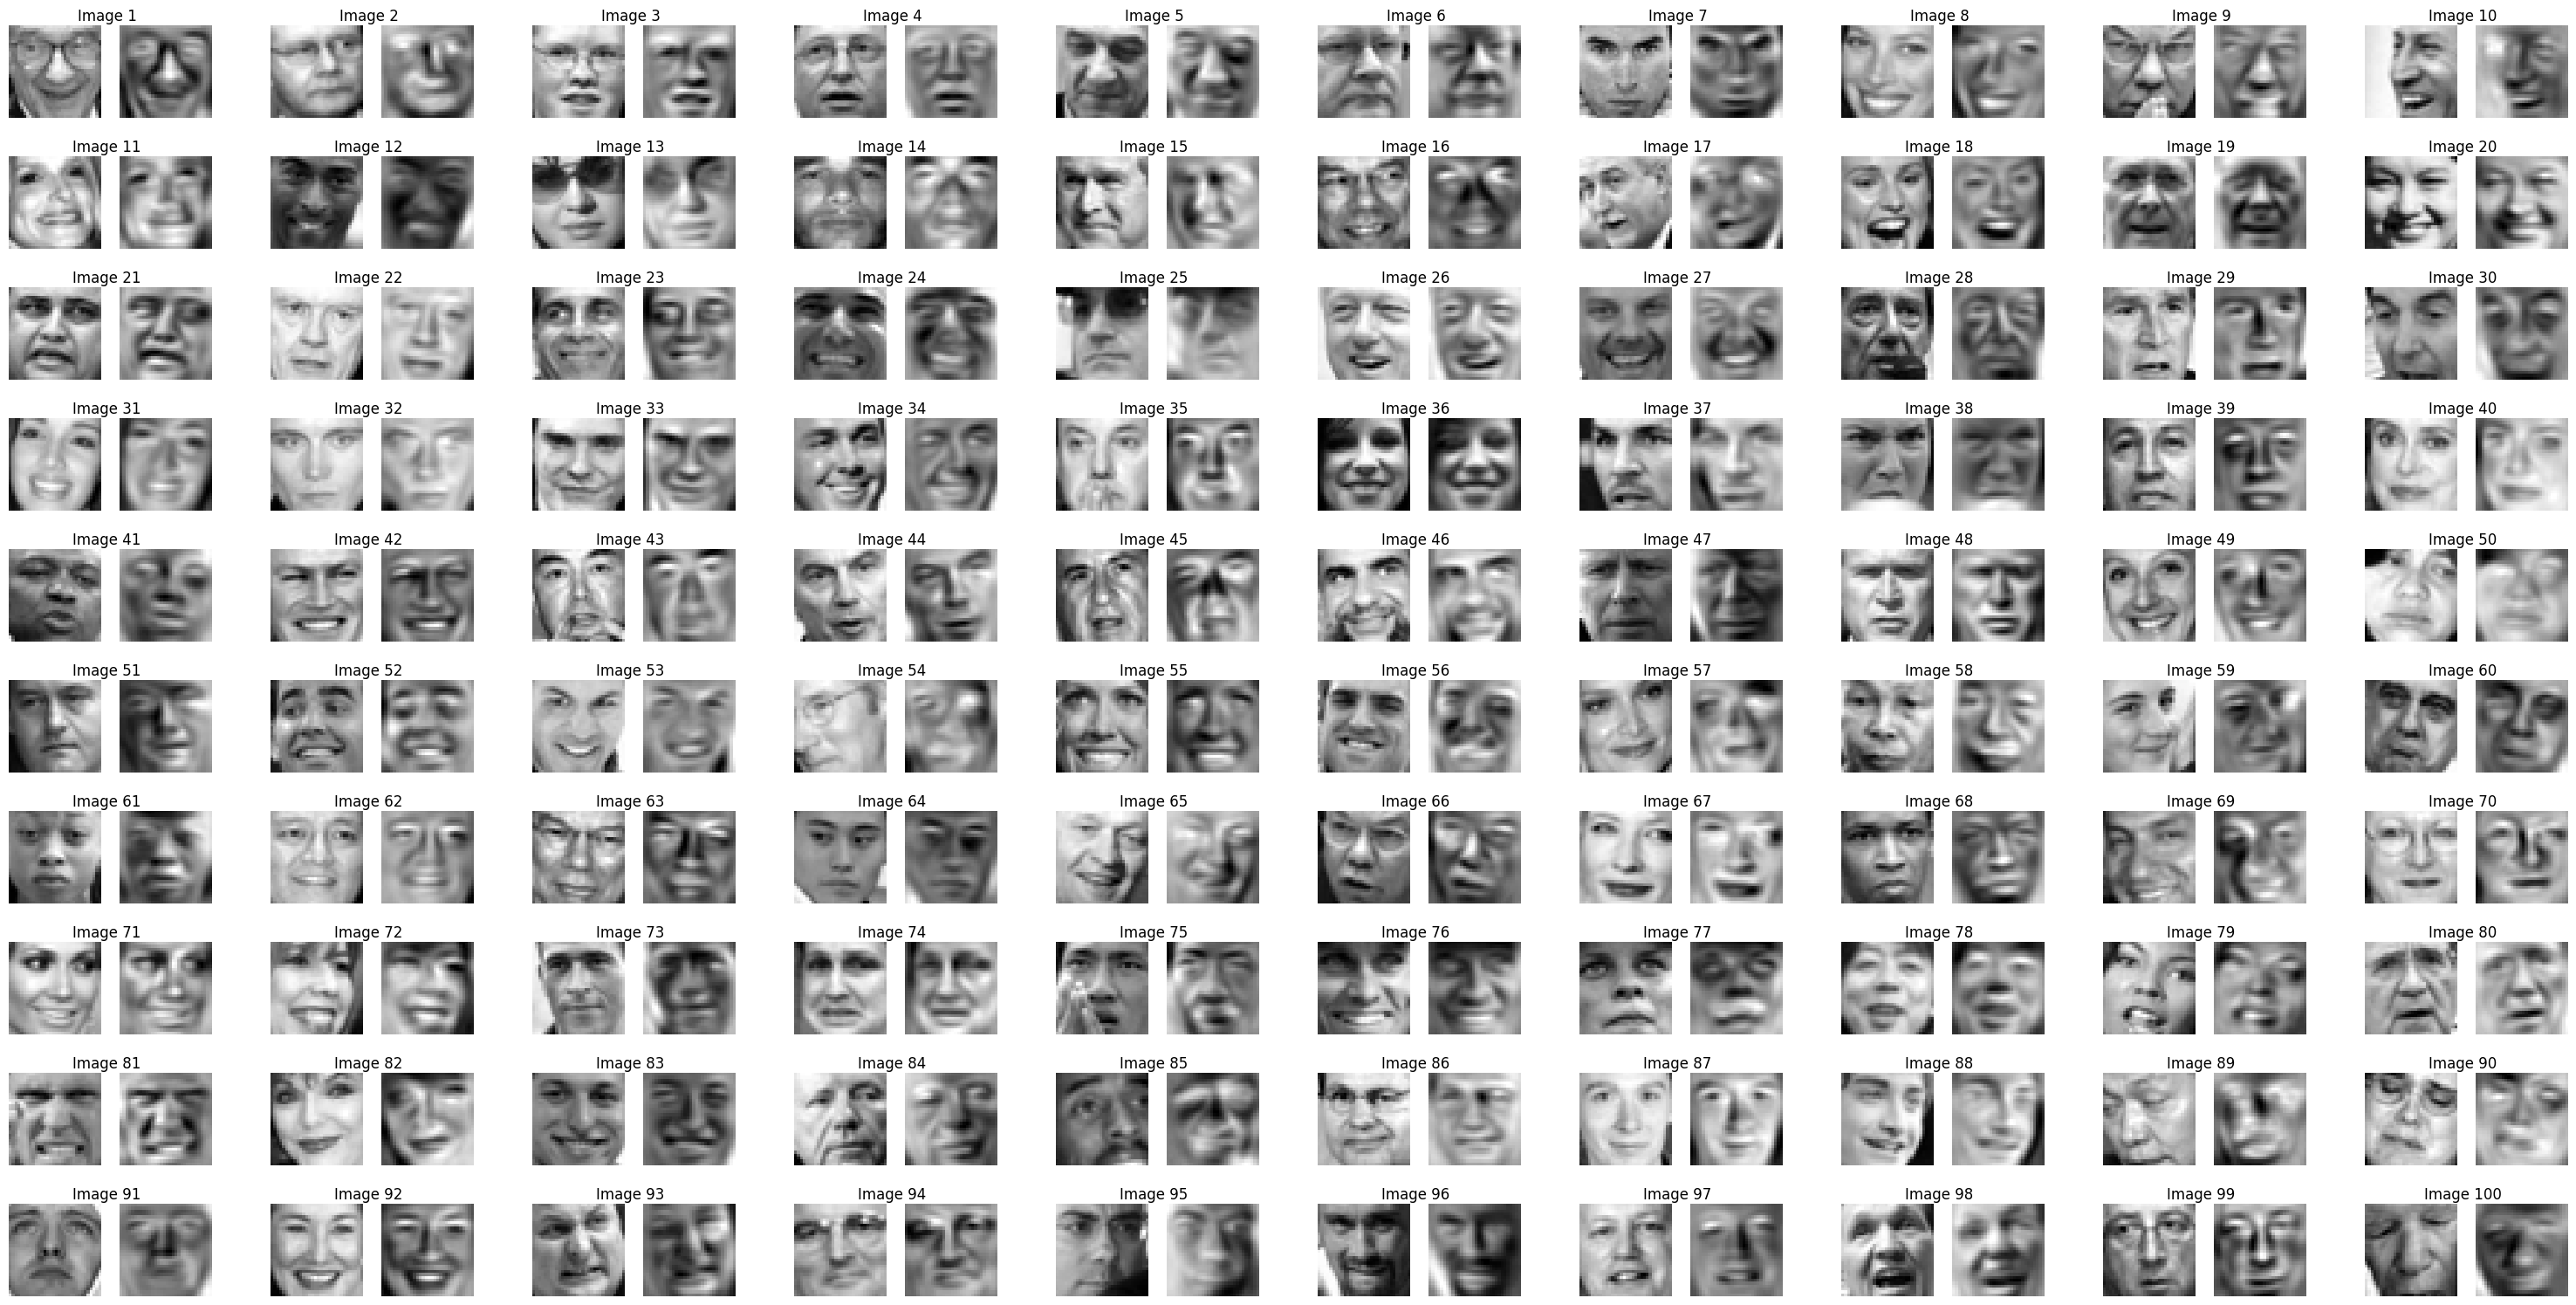

In [7]:
reconstructed = first_pc @ VT[:k, :]

fig = plt.figure(figsize=(30, 15))

subfigs = fig.subfigures(10, 10)

for outerind, subfig in enumerate(subfigs.flat):
    subfig.suptitle(f'Image {outerind + 1}')
    axs = subfig.subplots(1, 2)
    for innerind, ax in enumerate(axs.flat):
        if innerind == 0:
            ax.imshow(np.transpose(np.reshape(X[outerind, :], (32, 32))), cmap='gray')
        else:
            ax.imshow(np.transpose(np.reshape(reconstructed[outerind, :], (32, 32))), cmap='gray')
        ax.axis('off')

plt.show()


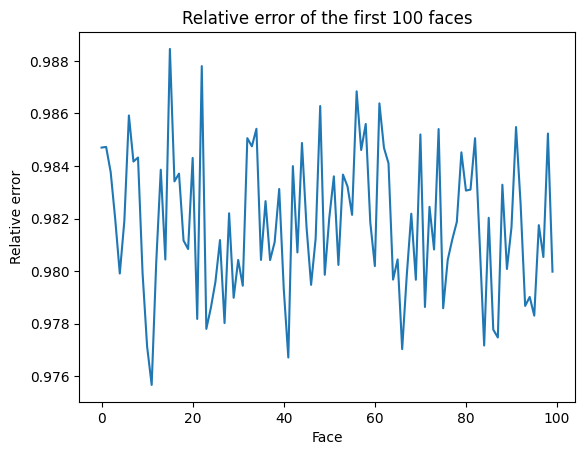

In [8]:
# Get the relative error of the first 100 faces
error = np.linalg.norm(X - reconstructed, axis=1) / np.linalg.norm(X, axis=1)

plt.plot(error[:k])
plt.xlabel('Face')
plt.ylabel('Relative error')
plt.title('Relative error of the first 100 faces')
plt.show()

### Exercise 2

Consider the following simple linear network:
$$a(\mathbf{v}, \mathbf{w}) = \mathbf{w} \cdot \mathbf{v} \quad \quad (1)$$

where $\mathbf{w} = [w, b]^T$ is the parameter vector ($w$ is the weight and $b$ the bias) and $\mathbf{v} = [x, 1]^T$ is the input vector. 

Consider the samples $(x_1, y_1) = (2, 0.5)$ and $(x_2, y_2) = (-1, 0)$ and the cost function:
$$J(\mathbf{w}) = (y_1 - a(\mathbf{v}_1, \mathbf{w}))^2 + (y_2 - a(\mathbf{v}_2, \mathbf{w}))^2 \quad \quad (2)$$

where $\mathbf{v}_1 = [x_1, 1]^T$ and $\mathbf{v}_2 = [x_2, 1]^T$.

#### 1) Rewrite the equation (2) as:
$$J(\mathbf{w}) = \frac{1}{2} \mathbf{w}^T A \mathbf{w} + \mathbf{d}^T \mathbf{w} + c$$ 

**Answer:**

We have the following:

$$J(w) = (y_1 - w \cdot v_1)^2 + (y_2 - w \cdot v_2)^2$$
$$=y_1^2 - 2(y_1 v_1 + y_2 v_2)^T w + (w^T v_1)^2 + (w^T v_2)^2 + y_2^2$$

$$\Rightarrow d = -2(y_1 v_1 + y_2 v_2), \quad c = y_1^2 + y_2^2$$

For the $A$, we have:

$$(w^T v_1)^2 + (w^T v_2)^2 = w^Tv_1 v_1^T w + w^T v_2 v_2^T w$$
$$= w^T(v_1 v_1^T + v_2 v_2^T) w$$
$$ \Rightarrow A = 2 (v_1 v_1^T + v_2 v_2^T)$$

#### 2) Compute the value of the exact parameter vector $\mathbf{w}^*$ that minimize $J(\mathbf{w})$

$$J(w) = \frac{1}{2} w^T A w + d^T w + c$$
$$\Rightarrow \nabla J (w) = A w + d$$

$$\nabla J(w) = 0 \iff A w = - d$$

In [9]:
v1 = np.array([2, 1])
v2 = np.array([-1, 1])

y1 = 0.5
y2 = 0


A = 2 * (np.outer(v1, v1) + np.outer(v2, v2))
d = -2 * (np.dot(v1, y1) + np.dot(v2, y2))
c = y1 ** 2 + y2 ** 2

w = np.linalg.solve(A, -d)

w, b = w

print(f'w = {w :.4f}, b = {b :.4f}')

w = 0.1667, b = 0.1667


#### 3) Plot the surface that represents $J$

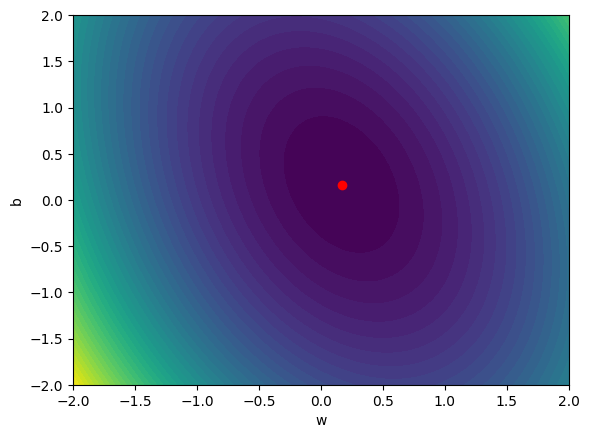

In [10]:
J = lambda w: 0.5 * w.T @ A @ w + d.T @ w + c

fig, ax = plt.subplots()

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = J(np.array([X[i, j], Y[i, j]]))

ax.contourf(X, Y, Z, 50)
ax.scatter([w], [b], color='red')
ax.set_xlabel('w')
ax.set_ylabel('b')

plt.show()

#### 4) Implement the gradient descent method and use it to compute $\mathbf{w}^*$: set the initial guess $\mathbf{w}^{(0)}$ equal to $[1, 1]^T$ and learning rate $\eta = 0.05$

In [11]:
def grad_descent(
        grad_f: callable,
        x0: np.ndarray,
        eta: float,
        tol: float = 1e-6,
        max_iter: int = 10000
) -> np.ndarray:
    
    x = x0
    x_prev = x0

    for i in range(max_iter):
        x = x - eta * grad_f(x)
        if np.linalg.norm(x - x_prev) < tol:
            break
        x_prev = x

    print(f'Converged after {i + 1} iterations')

    return x

In [12]:
w0 = np.array([1, 1])
grad_J = lambda w: A @ w + d
eta = 0.05

w_star = grad_descent(grad_J, w0, eta)

w_star, b_star = w_star
print(f'w* = {w_star :.4f}, b* = {b_star :.4f}')

Converged after 63 iterations
w* = 0.1667, b* = 0.1667


#### 5) What is the maximum value of the learning rate that can be used?

**Answer:**

Note that the function is convex and with Lipschitz continuous gradient, with constant $L = \|A\|$. So, to ensure convergence of GD, we must choose:
$$0 < \eta \leq \frac{1}{\|A\|}$$

Therefore, the max value of $\eta$ is $\frac{1}{\|A\|}$. Bigger values of $\eta$ may converge, but we won't have theoretical guarantees.

In [13]:
max_eta = 1 / (np.linalg.norm(A))

w0 = np.array([1, 1])

w_star = grad_descent(grad_J, w0, max_eta)

w_star, b_star = w_star
print(f'w* = {w_star :.4f}, b* = {b_star :.4f}')

Converged after 35 iterations
w* = 0.1667, b* = 0.1667


### Exercise 3

Consider a logistic regression:
$$\sigma(\beta^Tx) = \sigma(\beta_0 + \beta_1 x_1 + \beta_2 x_2) \quad \quad (3)$$

where $\sigma(c) = \frac{1}{1 + \exp(-c)}$

Let us consider the following sets of data:

![image.png](sets_ex3_16012025.png)


#### 1) Plot in 3 pictures the data contained in the 3 datasets (use different colors or symbols for the two classes). What is the main difference between set 1, 2 and 3? 

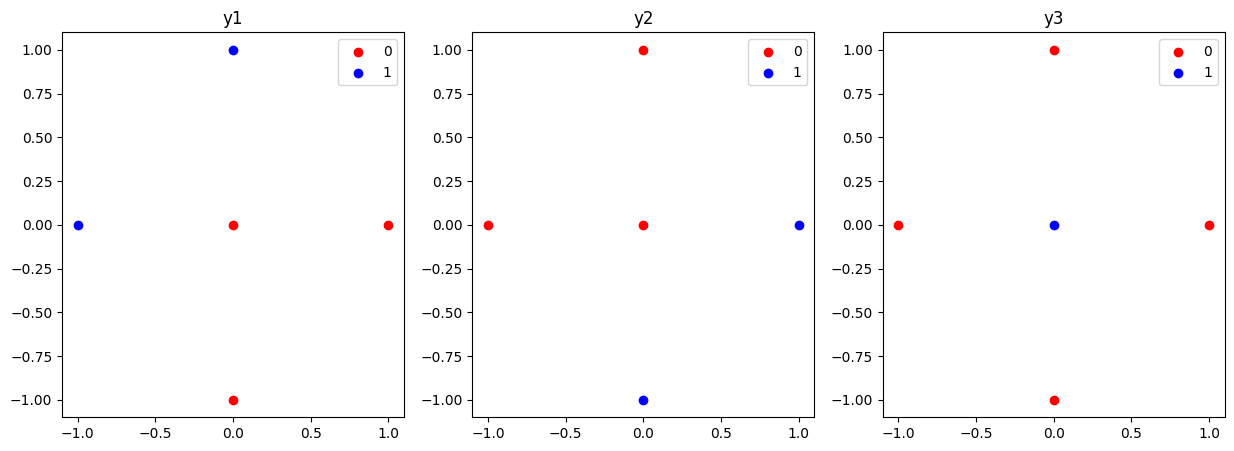

In [14]:
X = np.array([[0, 0], [1, 0], [0, -1], [-1, 0], [0, 1]])

y1 = np.array([0, 0, 0, 1, 1])
y2 = np.array([0, 1, 1, 0, 0])
y3 = np.array([1, 0, 0, 0, 0])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, y in enumerate([y1, y2, y3]):
    ax[i].scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='0')
    ax[i].scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='1')
    ax[i].set_title(f'y{i + 1}')

    ax[i].legend()

plt.show()

Notice that in the 3 datasets, we have the same points, but with different labelling. On the first two datasets, the classes are linearly separable, while in the third it is not possible to discriminate classes with a line. Also, we have a different frequency of classes between the third one and the first 2.

#### 2) Compute the vectors $\beta$ that allow to use (3) to classify the data contained in set 1 and 2, assuming a threshold $\epsilon = 0.5$ for the positive class. Is the solution unique? Motivate your answer.

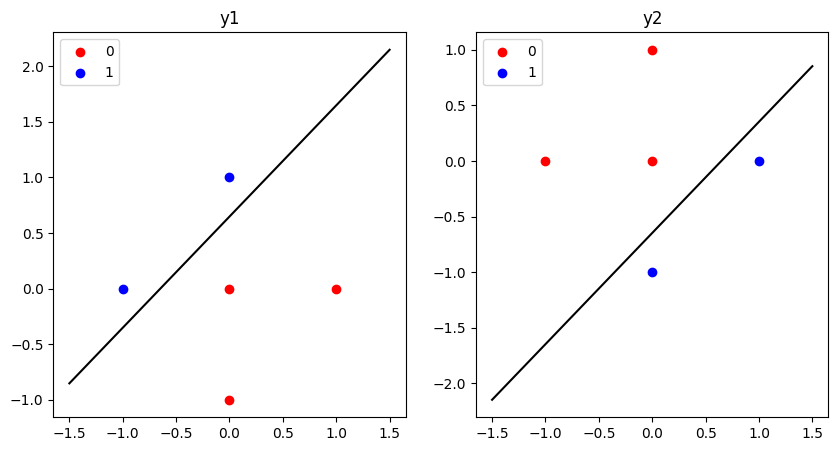

In [15]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X, y1)

model2 = LogisticRegression()
model2.fit(X, y2)

coefs1 = np.concatenate([model1.intercept_, model1.coef_[0]])
coefs2 = np.concatenate([model2.intercept_, model2.coef_[0]])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

y_s = [y1, y2]

for i, coefs in enumerate([coefs1, coefs2]):
    ax[i].scatter(X[y_s[i] == 0, 0], X[y_s[i] == 0, 1], color='red', label='0')
    ax[i].scatter(X[y_s[i] == 1, 0], X[y_s[i] == 1, 1], color='blue', label='1')
    ax[i].set_title(f'y{i + 1}')

    x = np.linspace(-1.5, 1.5, 100)
    y = (-coefs[0] - coefs[1] * x) / coefs[2]

    ax[i].plot(x, y, color='black')

    ax[i].legend()

plt.show()


Because the sets are linearly separable, the solution is not unique. To illustrate this fact, we need to see how the logistic regression works. In general, the model assumes that the classes in $Y$ follow a Bernoulli distribution:
$$Y \sim Bernoulli(p)$$

with $p$ being the probability of the positive class. We model this probability with the previously introduced sigmoid function:
$$p(x) = \sigma(\beta^T x) = \frac{1}{1 + \exp(-\beta^T x)}$$

To obtain the values of the coefficients $\beta$, we use the Maximum Likelihood Method, i.e., we want to maximize the probability of obtaining the observed labels, given the observed features. The probability of observing $y$ is calculated as follows:

$$\mathbb{P}(Y = y) = f(y) = p(x)^y (1 - p(x))^{1 - y}$$

If we assume independency between observations, the probability of getting the observed labels, given the observed data, is as follows:
$$f(y_1, ..., y_m | x_1, ..., x_m) = \prod_{i=1}^m p(x_i)^{y_i} (1 - p(x_i))^{(1-y_i)}$$

Now, we want to maximize this probability. This is essentially an optimization problem, and our anwer will be the coefficients $\beta$ that maximize this probability.

For the sake of the explanation, let us define the following:

* $p_1(x_i) = p(x_i)$: probability of class 1
* $p_0(x_i) = 1 - p(x_i)$: probability of class 0

We can rewrite the likelihood:
$$\prod_{i=1}^m p_1(x_i)^{y_i} p_0(x_i)^{(1-y_i)}$$


Now, notice that, if the points are linearly separable, it is possible to find a solution which assigns to each point a higher probability of being the correct class, i.e., if $y_i = 1$, then $p_1(x_i) > p_0(x_i)$ and the opposite if $y_i = 0$. This means that, for each term of the product, we will keep the higher value between $p_1$ and $p_0$. 

The last thing to notice is that, given a solution $\beta$, if we multiply the coefficients by a constant $k > 1$, it will have the following effects:

* If $p_1(x_i) > p_0(x_i)$, it means that $p_1(x_i) > 0.5$, so by rearranging the terms of $p_1$, we get that:
$$\beta^T x_i > 0$$

meaning that: 
$$p_1^{(k)}(x_i) = \frac{1}{1 + \exp(-k \beta^T x_i)} > \frac{1}{1 + \exp(- \beta^T x_i)} = p_1(x_i)$$

* If the opposite is true, we can prove that:
$$p_0^{(k)}(x_i) = 1 - \frac{1}{1 + \exp(-k \beta^T x_i)} > 1 - \frac{1}{1 + \exp(- \beta^T x_i)} = p_0(x_i)$$

So for a solution $\beta$ we have shown that we can find a new solution that increases the correct probability value for each point, and thus obtaining a higher likelihood value. But that means that $\beta$ wasn't the solution. So we conclude that the problem has no solution. (Note that the likelihood has as $\sup$ = 1, but it reaches it on $k = \infty$, so no vector in the real domain reaches the maximum).

Now, the question rises. How do the sklearn algorithm selects a solution? It simply adds a regularization term to the target function, to avoid the explosion of the coefficient values. This makes the function to optimize stricty concave, and thus obtaining a unique answer.

We can illustrate the proof with the following code, modifying the values for $k$:

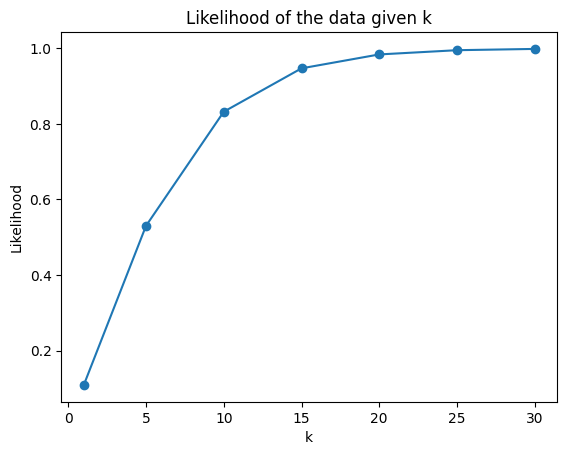

In [16]:
prob = lambda x: 1 / (1 + np.exp(-x))

vector = coefs1[0] + coefs1[1] * X[:, 0] + coefs1[2] * X[:, 1]

k = np.array([1, 5, 10, 15, 20, 25, 30])
p = [prob(k[i] * vector) for i in range(len(k))]

likelihood = [np.prod([p[j][i]**y1[i] * (1 - p[j][i])**(1 - y1[i]) for i in range(len(y1))]) for j in range(len(k))]

fig, ax = plt.subplots()

ax.plot(k, likelihood, marker='o')
ax.set_xlabel('k')
ax.set_ylabel('Likelihood')
ax.set_title('Likelihood of the data given k')
plt.show()



#### 3) Consider the following alternative system of coordinates $(\xi_1, \xi_2)$ to define the data contained in the set 3:

<p align="center">
  <img src="set3_ex3_16012025.png" alt="Alt text">
</p>

#### Explain how we can use $\xi_1$ and $\xi_2$ to classify the data contained in set 3. 

**Answer:**

The change of the coordinate system can be thought as an application of a specific kernel to the data points. Note now that the points in the new data set are linearly separable. In fact:

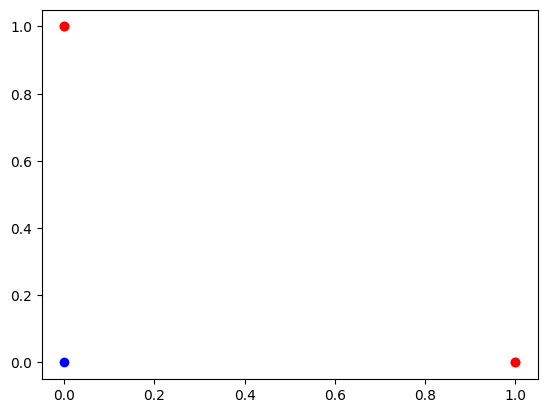

In [17]:
X_new = np.array([[0, 0], [0, 1], [0, 1], [1, 0], [1, 0]])

fig, ax = plt.subplots()

ax.scatter(X_new[y3 == 0, 0], X_new[y3 == 0, 1], color='red', label='0')
ax.scatter(X_new[y3 == 1, 0], X_new[y3 == 1, 1], color='blue', label='1')

plt.show()

Now, we can fit a logistic regression model on the new coordinate system for the data in set 3. And use it to classify the original data:

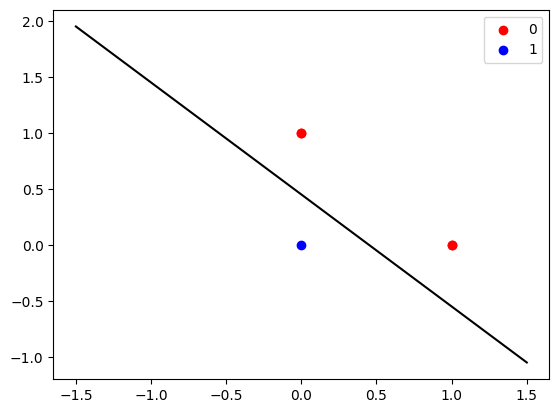

In [18]:
model3 = LogisticRegression(C=1e6)

model3.fit(X_new, y3)

coefs3 = np.concatenate([model3.intercept_, model3.coef_[0]])

fig, ax = plt.subplots()

ax.scatter(X_new[y3 == 0, 0], X_new[y3 == 0, 1], color='red', label='0')
ax.scatter(X_new[y3 == 1, 0], X_new[y3 == 1, 1], color='blue', label='1')

x = np.linspace(-1.5, 1.5, 100)
y = (-coefs3[0] - coefs3[1] * x) / coefs3[2]

ax.plot(x, y, color='black')

ax.legend()

plt.show()


#### 4) Propose a neural network to determine the parameters to be used to classify set 3

**Answer:**

Note that the logistic regression is just a Perceptron with a sigmoid activation function. Then, to determine the parameters of the regression, we can propose the simple perceptron as the neural network, with a sigmoid activation functin in the end.

Converged after 50000 iterations


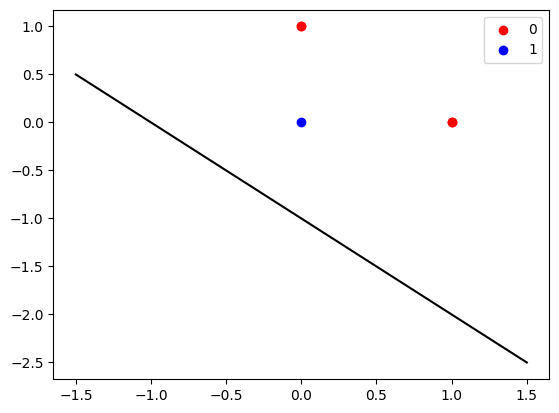

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def perceptron(X, y, w, b, eta, max_iter, tol=1e-2):
    for i in range(max_iter):
        for j in range(len(y)):
            y_hat = sigmoid(np.dot(w, X[j]) + b)

            if np.linalg.norm((y_hat - y[j]) * X[j]) < tol:
                break

            w = w - eta * (y_hat - y[j]) * X[j]
            b = b - eta * (y_hat - y[j]) 

    print(f'Converged after {i + 1} iterations')

    return w, b


w, b = perceptron(X_new, y3, np.array([1, 1]), 1, 0.01, 50000)

fig, ax = plt.subplots()

ax.scatter(X_new[y3 == 0, 0], X_new[y3 == 0, 1], color='red', label='0')
ax.scatter(X_new[y3 == 1, 0], X_new[y3 == 1, 1], color='blue', label='1')

x = np.linspace(-1.5, 1.5, 100)
y = (-b - w[0] * x) / w[1]

ax.plot(x, y, color='black')

ax.legend()

plt.show()